Team: Vaish Gajaraj(vg289), Daniel Robinson (dr493), Alexander Salonga (as2739), Audrey Yap(amy34)

In [2]:
pip install haversine

In [3]:
import pandas as pd
import numpy as np
import sys, math, os, json, re, random
import scipy.stats as stats
import scipy.linalg as scl
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
from haversine import haversine, Unit

# jupyter magic to display plots directly in the notebook
%matplotlib inline

# use vector graphics format for nicer plots
%config Inline.Backend.figure_format = 'svg'

In [4]:
from google.colab import drive
drive.mount('/content/drive')



Mounted at /content/drive


In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
data_df = pd.read_csv("/content/drive/My Drive/ProjectData.csv")

In [7]:
data_df.head()

,Call ID,Time,Lat,Lon,Safe to fly,Heli avail,CancelDelay,Scene time,Hosp lat,Hosp Lon,Hosp time
0,0,0.698273,43.606190,75.110334,1,1,0.0,0.376066,43.1009,75.2327,0.741709
1,1,0.790623,43.086142,77.470693,1,1,0.0,0.494475,43.1566,77.6088,0.276576
2,2,3.445114,42.781114,73.757133,1,1,0.0,0.223929,42.6526,73.7562,0.265198
3,3,3.742029,42.523381,76.452085,1,1,0.0,0.232449,42.4440,76.5019,0.494395
4,4,6.399294,43.204620,75.936761,1,1,0.0,0.447068,43.0481,76.1474,1.189299


## Part 1

In [ ]:
total_calls = 16994

In [ ]:
unsafe = (data_df['Safe to fly'] == 0).sum()

In [ ]:
print(f'Fraction of calls that are not handled due to unsafe conditions is: {unsafe/total_calls}')

Fraction of calls that are not handled due to unsafe conditions is: 0.10074143815464282


## Part 2

In [ ]:
unavailable = (data_df['Heli avail'] == 0).sum()

In [ ]:
print(f'Fraction of calls where helis are not available in range: {unavailable/total_calls}')

Fraction of calls where helis are not available in range: 0.1880075320701424


## Part 3

In [8]:
df = data_df[data_df['Safe to fly'] != 0]
df = df[df['Heli avail'] != 0]
df = df[df['CancelDelay'] !=0]

In [9]:
df.head()

,Call ID,Time,Lat,Lon,Safe to fly,Heli avail,CancelDelay,Scene time,Hosp lat,Hosp Lon,Hosp time
12,12,9.257497,43.192483,75.965369,1,1,0.114044,0.0,0.0,0.0,0.0
21,21,12.611531,42.057368,75.764943,1,1,0.032231,0.0,0.0,0.0,0.0
24,24,14.217430,43.230590,77.324502,1,1,0.072960,0.0,0.0,0.0,0.0
86,86,38.509200,42.563850,74.025929,1,1,0.477003,0.0,0.0,0.0,0.0
98,98,40.607907,43.160476,75.323136,1,1,0.392791,0.0,0.0,0.0,0.0


For X_i > 30, we have Y_i = 0
and X_i =< 30, we have Y_i = X_i so Max likelihood estimator for exponential parameter $\hat{\lambda} = \frac{n}{\prod_i^n x_i + \prod_j^n y_j}$, where $x_i$ are the (uncensored) cancellation times and $y_i$ are the (censored) cancellation times. The scale term for our exponential distribution density is therefore $\frac{1}{\hat{\lambda}} = $ sample mean of the cancellation times. 

In [36]:
df1 = data_df[data_df['Safe to fly'] != 0]
df1 = data_df[data_df['Heli avail'] != 0]
len(df1)

13799

In [58]:
r = len(df['CancelDelay'])
print(r)

1345


In [59]:
n = len(df1)
print(n)

13799


In [57]:
s = (df.CancelDelay.sum())
print(s)

329.04350671500004


In [60]:
lambdahat = r/(s+0.5*(n-r))
print(lambdahat)

0.2051542212345585


In [64]:
(counts, bins) = np.histogram(df['CancelDelay'])

In [61]:
exp_mean = 1/lambdahat
cancel_delays = np.arange(0, max(df['CancelDelay']),0.001)
dist_exp = stats.expon.pdf(cancel_delays, scale = exp_mean)

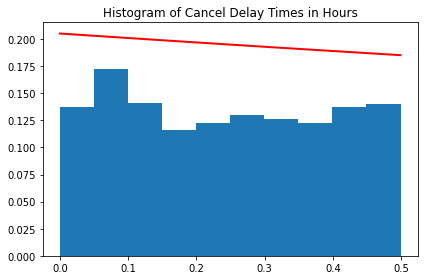

In [65]:
factor = 1/1000
plt.hist(bins[:-1], bins, weights=factor*counts)
plt.plot(cancel_delays, dist_exp, '-r', lw=2)
plt.title('Histogram of Cancel Delay Times in Hours')
plt.tight_layout()

# Part 4

Plot a histogram of the scene times (for those calls with a scene time) and fit and overlay a distribution
to these data that is a good fit. Be sure to explain how you decided on this distribution. You should try at
least Gamma, Beta, Lognormal, Exponential, Pareto, and Weibull. You may find a fitting package useful.
For example, this page describes the use of scipy: https://medium.com/@amirarsalan.rajabi/distributionfitting-with-python-scipy-bb70a42c0aed

In [ ]:
df = data_df
scene_train = df[df["Scene time"] != 0]
scene_train = scene_train['Scene time']

beta = getattr(stats, 'beta')
lognorm = getattr(stats, 'lognorm')
expon = getattr(stats, 'expon')
dweibull = getattr(stats, 'dweibull')
gamma = getattr(stats, 'gamma')
pareto = getattr(stats, 'pareto')

/usr/local/lib/python3.7/dist-packages/scipy/stats/_continuous_distns.py:547: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)


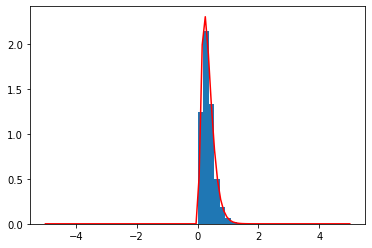

In [ ]:
param1, param2, param3, param4  = beta.fit(scene_train)

x = np.linspace(-5,5,100)

fitted_data = beta.pdf(x, param1, param2, param3, param4)

plt.hist(scene_train, density=True)
plt.plot(x,fitted_data,'r-')

NameError: ignored

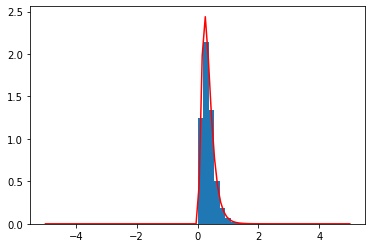

In [ ]:
scale, size, moments  = lognorm.fit(scene_train)

x = np.linspace(-5,5,100)

fitted_data = lognorm.pdf(x, scale, size,moments)

plt.hist(scene_train, density=True)
plt.plot(x,fitted_data,'r-')

#fitted_data = scipy.stats.distributions.beta.pdf(x,beta_parameters[0],beta_parameters[1],beta_parameters[2],beta_parameters[3])

plt.hist(scene_train, density=True)
plt.plot(x,fitted_data,'r-')

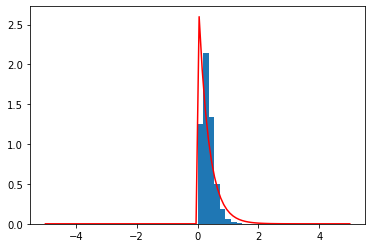

In [ ]:
param1, param2  = expon.fit(scene_train)

x = np.linspace(-5,5,100)

fitted_data = expon.pdf(x, param1, param2)

plt.hist(scene_train, density=True)
plt.plot(x,fitted_data,'r-')

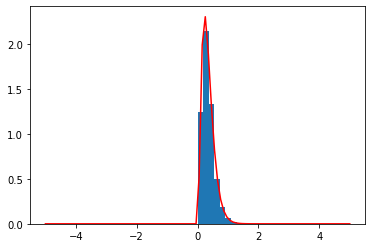

In [ ]:
param1, param2, param3  = gamma.fit(scene_train)

x = np.linspace(-5,5,100)

fitted_data = gamma.pdf(x, param1, param2, param3)

plt.hist(scene_train, density=True)
plt.plot(x,fitted_data,'r-')

/usr/local/lib/python3.7/dist-packages/scipy/stats/_distn_infrastructure.py:2407: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu


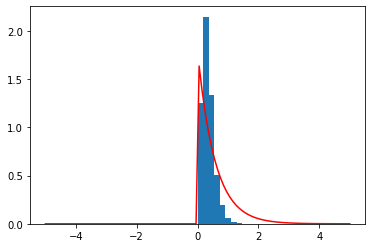

In [ ]:
param1, param2, param3  = pareto.fit(scene_train)

x = np.linspace(-5,5,100)

fitted_data = pareto.pdf(x, param1, param2, param3)

plt.hist(scene_train, density=True)
plt.plot(x,fitted_data,'r-')

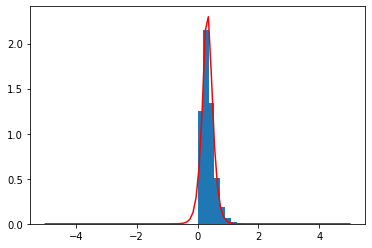

In [ ]:
param1, param2, param3  = dweibull.fit(scene_train)

x = np.linspace(-5,5,100)

fitted_data = dweibull.pdf(x, param1, param2, param3)

plt.hist(scene_train, density=True)
plt.plot(x,fitted_data,'r-')

Gamma and beta best fit this data as the distribution follows the histogram.

# Part 5

In [ ]:
hospital_train = df[df["Hosp time"] != 0]
hospital_train = hospital_train['Hosp time']

/usr/local/lib/python3.7/dist-packages/scipy/stats/_continuous_distns.py:547: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)


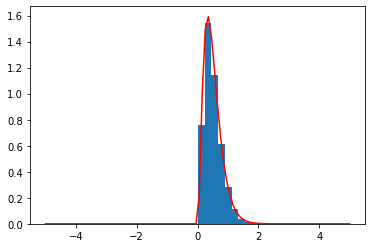

In [ ]:
param1, param2, param3, param4  = beta.fit(hospital_train)

x = np.linspace(-5,5,100)

fitted_data = beta.pdf(x, param1, param2, param3, param4)

plt.hist(hospital_train, density=True)
plt.plot(x,fitted_data,'r-')

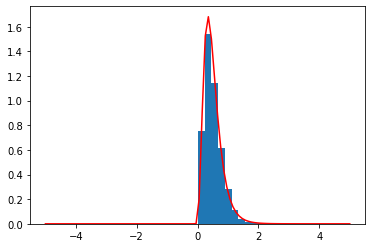

In [ ]:
scale, size, moments  = lognorm.fit(hospital_train)

x = np.linspace(-5,5,100)

fitted_data = lognorm.pdf(x, scale, size,moments)

plt.hist(hospital_train, density=True)
plt.plot(x,fitted_data,'r-')

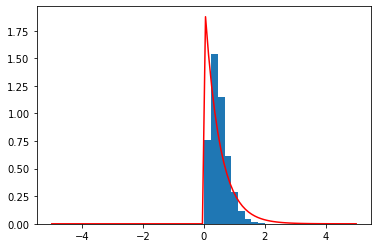

In [ ]:
param1, param2  = expon.fit(hospital_train)

x = np.linspace(-5,5,100)

fitted_data = expon.pdf(x, param1, param2)

plt.hist(hospital_train, density=True)
plt.plot(x,fitted_data,'r-')

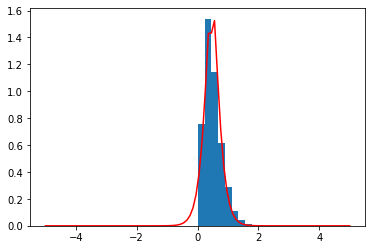

In [ ]:
param1, param2, param3  = dweibull.fit(hospital_train)

x = np.linspace(-5,5,100)

fitted_data = dweibull.pdf(x, param1, param2, param3)

plt.hist(hospital_train, density=True)
plt.plot(x,fitted_data,'r-')

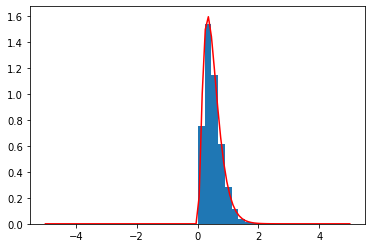

In [ ]:
param1, param2, param3  = gamma.fit(hospital_train)

x = np.linspace(-5,5,100)

fitted_data = gamma.pdf(x, param1, param2, param3)

plt.hist(hospital_train, density=True)
plt.plot(x,fitted_data,'r-')

/usr/local/lib/python3.7/dist-packages/scipy/stats/_distn_infrastructure.py:2407: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu


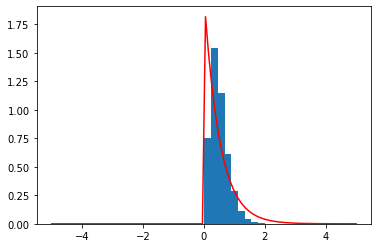

In [ ]:
param1, param2, param3  = pareto.fit(hospital_train)

x = np.linspace(-5,5,100)

fitted_data = pareto.pdf(x, param1, param2, param3)

plt.hist(hospital_train, density=True)
plt.plot(x,fitted_data,'r-')

Here gamma and beta distributions best fit the data

# Part 6

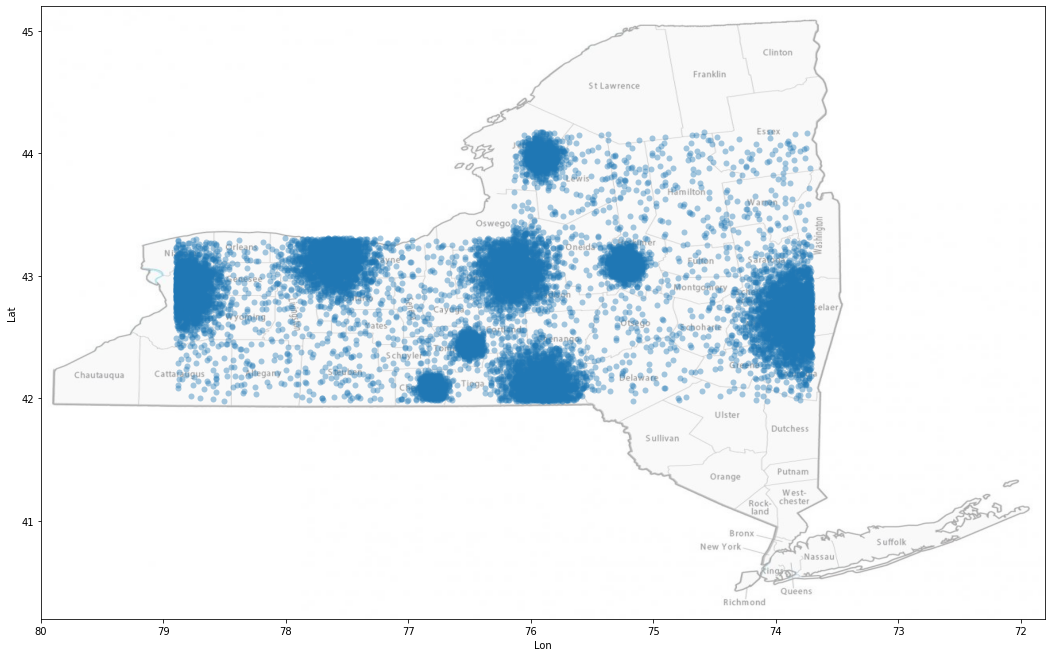

In [ ]:
latN = 45.2
latS = 40.2
lonW = 80.0
lonE = 71.8
import matplotlib.image as mpimg
fig = plt.figure(figsize=(18,12))
ny_img = mpimg.imread('/content/drive/My Drive/ny.jpeg') #https://gisgeography.com/wp-content/uploads/2020/02/New-York-County-Map.jpg
plt.imshow(ny_img, extent=[lonW, lonE, latS, latN], alpha=0.5)
sns.scatterplot(x="Lon", y="Lat", linewidth=0,data=data_df,alpha=0.4)

In [ ]:
r1 = data_df[data_df['Lat']>=43.4]
sq1 = r1[r1['Lon']>= 75]
sq2 = r1[r1['Lon']< 75]

r2 = data_df[data_df['Lat']<43.4]
lat_min = r2['Lon'].min()
spacing = 43.4 - data_df['Lat'].min()
print(spacing)
sq3 = r2[r2['Lon']<=lat_min + spacing-.1]

r3 = r2[r2['Lon']<=lat_min + 2*spacing+.1]
sq4 = r3[r3['Lon']>lat_min + spacing-.1]

r4 = r2[r2['Lon']<=lat_min + 3*spacing]
sq5 = r4[r4['Lon']>lat_min + 2*spacing+.1]

r5= r2[r2['Lon']<=lat_min + 4*spacing]
sq6 = r5[r5['Lon']>lat_min + 3*spacing]

1.420826599999998


In [ ]:
c1 = len(sq1)
c2 = len(sq2)
c3 = len(sq3)
c4 = len(sq4)
c5 = len(sq5)
c6 = len(sq6)
c1+c2+c3+c4+c5+c6 == len(data_df)

True

In [ ]:
total = len(data_df)
print("Probability of call is in square 1: " + str(c1/total))
print("Probability of call is in square 2: " + str(c2/total))
print("Probability of call is in square 3: " + str(c3/total))
print("Probability of call is in square 4: " + str(c4/total))
print("Probability of call is in square 5: " + str(c5/total))
print("Probability of call is in square 6: " + str(c6/total))

Probability of call is in square 1: 0.08044015534894669
Probability of call is in square 2: 0.009415087678004001
Probability of call is in square 3: 0.19865835000588444
Probability of call is in square 4: 0.37819230316582325
Probability of call is in square 5: 0.19542191361657055
Probability of call is in square 6: 0.1378721901847711


# Part 7

We need to understand the hospital that helicopters choose as a function of where the call arises. A
reasonable assumption is that helicopters mostly fly to a medical facility that is closest to the call and in
the remaining cases they fly to a major trauma center. Major trauma centers are located in Rochester,
Syracuse, Albany and Sayre PA. 

1. Plot the locations of the first two weeks of calls in a scatter plot, indicating
the choice of hospital for calls transported to a hospital by a line from the call to the hospital. This plot
can help confirm the assumption we just made. Keep in mind that computing distances between lat/lon
points can be a bit tricky; the package “haversine” can help with that.

2. Transported calls that are closer to one of the 4 trauma centers than to any other hospital automatically
go to the closest trauma center. For the other transported calls, estimate the fraction that fly to their
closest medical facility, h, say. You may assume there is a single value of h, rather than a different one for
every part of the state. You may assume that there are no medical facilities used by the helicopter service
except those that already appear in your dataset

In [ ]:
#Subset of data from first two weeks
first_two_weeks = data_df[data_df['Time'] <= 336]
first_two_weeks = first_two_weeks[first_two_weeks['Hosp lat'] > 0]
first_two_weeks = first_two_weeks.reset_index(drop=True)
first_two_weeks.tail()

,Call ID,Time,Lat,Lon,Safe to fly,Heli avail,CancelDelay,Scene time,Hosp lat,Hosp Lon,Hosp time
467,653,332.274295,41.982731,77.807753,1,1,0.0,0.486530,42.0898,76.8077,0.402811
468,654,332.840926,42.592515,73.784910,1,1,0.0,0.256495,42.6526,73.7562,0.884130
469,655,334.641158,43.076778,75.212643,1,1,0.0,0.141079,43.1009,75.2327,0.802522
470,656,335.098380,43.897852,75.850560,1,1,0.0,0.652554,43.9748,75.9108,0.396211
471,657,335.726504,42.964670,76.287763,1,1,0.0,0.553680,43.0481,76.1474,0.367875


In [ ]:
#for full data set
N = len(data_df['Lat'])
origin_y = [data_df['Lat'][i] for i in range(N)]
origin_x = [data_df['Lon'][i] for i in range(N)]
hospital_dest_y = [data_df['Hosp lat'][i] for i in range(N)]
hospital_dest_x = [data_df['Hosp Lon'][i] for i in range(N)]

In [ ]:
#for full data set
distances_from_origin_to_hosp = [haversine((origin_x[i],origin_y[i]), (hospital_dest_x[i],hospital_dest_y[i])) for i in range(N)]
len(distances_from_origin_to_hosp)

16994

In [ ]:
data_df['Hosp lat'].unique()

array([43.1009, 43.1566, 42.6526, 42.444 , 43.0481, 43.9748,  0.    ,
       42.0898, 42.0987, 42.8864, 41.979 ])

In [ ]:
rochester_syracuse_albany_sayre = [(77.6088,43.1566),( 76.1474,43.0481),( 73.7562,42.6526),( 76.5155,41.979)]
trauma_center_names = ['rochester', 'syracuse', 'albany', 'sayre']
distances_from_origin_to_trauma_centers = [haversine((origin_x[i],origin_y[i]), (hospital_dest_x[i],hospital_dest_y[i])) for i in range(N) if (hospital_dest_x[i],hospital_dest_y[i]) in rochester_syracuse_albany_sayre]
distances_from_origin_to_nearest_hospital = [haversine((origin_x[i],origin_y[i]), (hospital_dest_x[i],hospital_dest_y[i])) for i in range(N) if (hospital_dest_x[i],hospital_dest_y[i]) not in rochester_syracuse_albany_sayre]

print(len(distances_from_origin_to_trauma_centers))
print(len(distances_from_origin_to_nearest_hospital))
print(len(distances_from_origin_to_trauma_centers)+len(distances_from_origin_to_nearest_hospital) == len(distances_from_origin_to_hosp))


trauma_center_transport_percentage = len(distances_from_origin_to_trauma_centers)/ len(distances_from_origin_to_hosp)
h = len(distances_from_origin_to_nearest_hospital)/ len(distances_from_origin_to_hosp)
print(h)


7044
9950
True
0.5855007649758739


In [ ]:
#coordinates from first two weeks

N = len(first_two_weeks['Lat'])
origin_y = [first_two_weeks['Lat'][i] for i in range(N)]
origin_x = [first_two_weeks['Lon'][i] for i in range(N)]
hospital_dest_y = [first_two_weeks['Hosp lat'][i] for i in range(N)]
hospital_dest_x = [first_two_weeks['Hosp Lon'][i] for i in range(N)]
x_coor = [origin_x,hospital_dest_x]
y_coor = [origin_y,hospital_dest_y]

In [ ]:
#Analysis over first two weeks
rochester_syracuse_albany_sayre = [(77.6088,43.1566),( 76.1474,43.0481),( 73.7562,42.6526),( 76.5155,41.979)]
trauma_center_names = ['rochester', 'syracuse', 'albany', 'sayre']
distances_from_origin_to_trauma_centers = [haversine((origin_x[i],origin_y[i]), (hospital_dest_x[i],hospital_dest_y[i])) for i in range(N) if (hospital_dest_x[i],hospital_dest_y[i]) in rochester_syracuse_albany_sayre]
distances_from_origin_to_nearest_hospital = [haversine((origin_x[i],origin_y[i]), (hospital_dest_x[i],hospital_dest_y[i])) for i in range(N) if (hospital_dest_x[i],hospital_dest_y[i]) not in rochester_syracuse_albany_sayre]

print(len(distances_from_origin_to_trauma_centers))
print(len(distances_from_origin_to_nearest_hospital))
print(len(distances_from_origin_to_trauma_centers)+len(distances_from_origin_to_nearest_hospital) == len(distances_from_origin_to_hosp))


trauma_center_transport_percentage = len(distances_from_origin_to_trauma_centers)/ N
h = len(distances_from_origin_to_nearest_hospital)/ N
print(h)

259
213
False
0.451271186440678


##### The above analysis indicates that h = 58.5% for all calls in the dataframe, and for the first two weeks h = 45.1%. This represents the percentage of calls that are taken to a hospital over one of the trauma centers in rochester', 'syracuse', 'albany', or 'sayre'. 

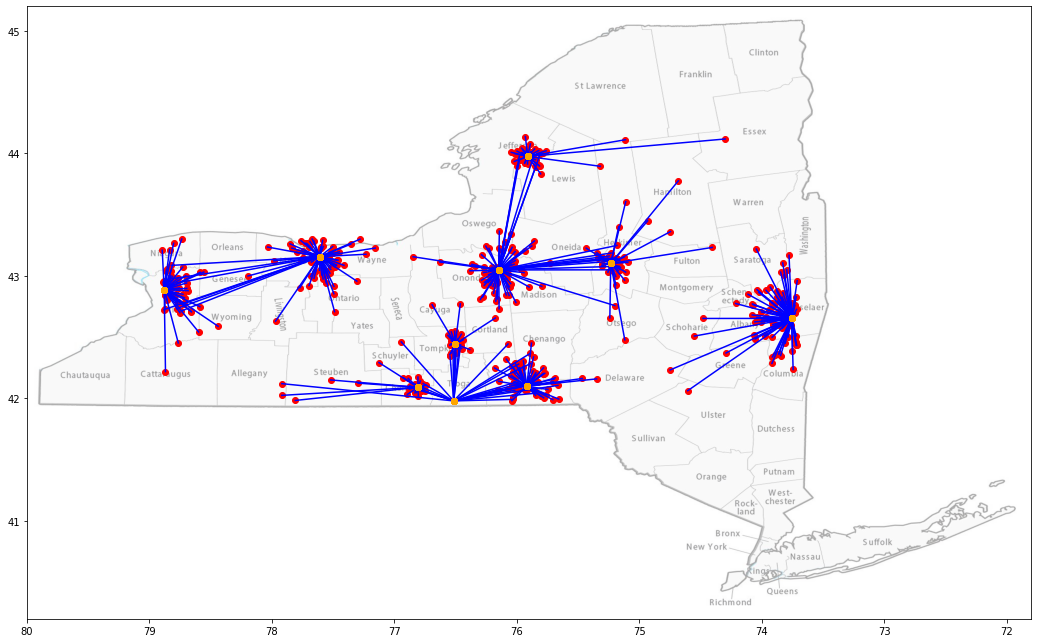

In [ ]:
latN = 45.2
latS = 40.2
lonW = 80.0
lonE = 71.8
import matplotlib.image as mpimg
fig = plt.figure(figsize=(18,12))
ny_img=mpimg.imread('/content/drive/My Drive/ny.jpeg') #https://gisgeography.com/wp-content/uploads/2020/02/New-York-County-Map.jpg
plt.imshow(ny_img, extent=[lonW, lonE, latS, latN], alpha=0.5)
plt.scatter(x=first_two_weeks["Lon"], y=first_two_weeks["Lat"], color = 'red',zorder = 1)
plt.plot(x_coor, y_coor, color='blue',zorder = 2);
plt.scatter(x=first_two_weeks["Hosp Lon"], y=first_two_weeks["Hosp lat"],color = 'orange',zorder = 3)



# Part 8

In [ ]:
max(data_df['Time'])
upper_bounds =np.arange(24,8760,24) 
lower_bounds = np.arange(0,8736,24) 
time_of_day_lb = np.arange(0,24,1) 
time_of_day_ub = np.arange(1,25,1) 

In [ ]:
lambda_i = np.zeros(len(time_of_day_lb))

for i in range(len(lower_bounds)):
    #subset the day
    subset_i = data_df[(data_df['Time']>=lower_bounds[i]) &  (data_df['Time']<=upper_bounds[i])]
    for t in range(len(time_of_day_lb)):
        #subset each hour of the day
        subset_i_t = subset_i[(subset_i['Time']>=lower_bounds[i]+time_of_day_lb[t]) & (subset_i['Time']<=upper_bounds[i]+time_of_day_ub[t])]
        
        number_of_requests = len(subset_i_t)

        lambda_i[t] += number_of_requests/(1)
        
        
lambda_i = [i/len(upper_bounds) for i in lambda_i]
lambda_i

[46.68681318681319,
 45.964285714285715,
 45.34615384615385,
 44.972527472527474,
 44.65384615384615,
 44.387362637362635,
 44.10989010989011,
 43.620879120879124,
 42.84340659340659,
 41.14835164835165,
 38.4010989010989,
 35.20879120879121,
 31.48901098901099,
 27.524725274725274,
 23.85164835164835,
 20.03846153846154,
 16.354395604395606,
 12.793956043956044,
 9.596153846153847,
 6.541208791208791,
 4.260989010989011,
 2.8653846153846154,
 1.695054945054945,
 0.8131868131868132]

In [ ]:
dict_lambdas = {'Lower bound time': time_of_day_lb,
                'Upper bound time': time_of_day_ub,
                'Lambda rate (arrivals per hour per day)': lambda_i}
table = pd.DataFrame(dict_lambdas)

Text(0.5, 0, 'Hour of the day')

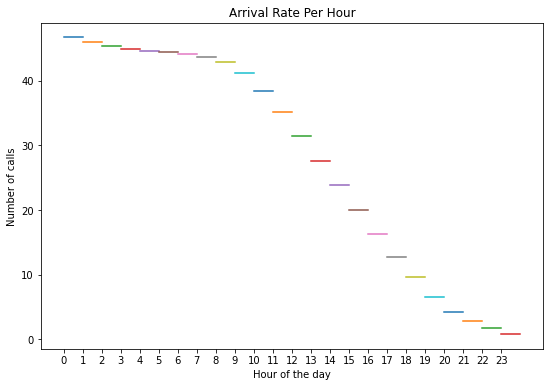

In [ ]:
plt.figure(figsize=(9,6))

for i in range(24):
    plt.plot(np.arange(time_of_day_lb[i],time_of_day_ub[i]+1),table['Lambda rate (arrivals per hour per day)'][i]*np.ones(2) )

plt.xticks(range(24)) ;   

plt.title("Arrival Rate Per Hour")
plt.ylabel("Number of calls")
plt.xlabel('Hour of the day')

# Part 9

In [ ]:
a = 5/60
b = 10/60
c = 7/60
print(a,b,c)

0.08333333333333333 0.16666666666666666 0.11666666666666667


We will use a triangular distribution with parameters a = 1/12 lower bound, b = 1/6 upper bound, and most likely value c = 7/60 to model the delay at the helicopter dispatch with the parameters in terms of hours.

---



# Part 10

In [ ]:
a = 5/60
b = 10/60
c = 7.5/60
print(a,b,c)

0.08333333333333333 0.16666666666666666 0.125


We will use a triangular distribution with parameters a = 1/12 lower bound, b = 1/6 upper bound, and most likely value c = 1/8 to model the delay for flight checks and flight preparation in terms of hours.